In [27]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# 파일 불러오기
all = pd.read_excel("../데이터자료/Join_data.xlsx", index_col = 0)    

# 컬럼 추출
# all2 = all[['DateTime', '종가_ex','1Y_전일비_irs', '2Y_전일비_irs', '3Y_전일비_irs',
#         '5Y_전일비_irs', '10Y_전일비_irs',  '1Y_전일비_crs', '2Y_전일비_crs','3Y_전일비_crs','5Y_전일비_crs','10Y_전일비_crs',
#         '국고1년', '국고3년', '국고5년','국고10년', '통안364일', '통안2년', 'Mid_ndf',
#         'M1_스왑포인트']]            # [[]] 대괄호 2개 사용 -> 데이터 프레임형태로 나옴

all2 = all[['DateTime', '종가_ex','1Y_Mid_irs', '2Y_Mid_irs', '3Y_Mid_irs',
        '5Y_Mid_irs', '10Y_Mid_irs',  '1Y_Mid_crs', '2Y_Mid_crs','3Y_Mid_crs','5Y_Mid_crs','10Y_Mid_crs',
        '국고1년', '국고3년', '국고5년','국고10년', '통안364일', '통안2년', 'Mid_ndf',
        'M1_스왑포인트']]     
        
all2 = all2.set_index("DateTime")

all2['1Y_대비_irs'] = all2['1Y_Mid_irs']-all2['1Y_Mid_irs'].shift(1)
all2['2Y_대비_irs'] = all2['2Y_Mid_irs']-all2['2Y_Mid_irs'].shift(1)
all2['3Y_대비_irs'] = all2['3Y_Mid_irs']-all2['3Y_Mid_irs'].shift(1)
all2['5Y_대비_irs'] = all2['5Y_Mid_irs']-all2['5Y_Mid_irs'].shift(1)
all2['10Y_대비_irs'] = all2['10Y_Mid_irs']-all2['10Y_Mid_irs'].shift(1)
all2['1Y_대비_crs'] = all2['1Y_Mid_crs']-all2['1Y_Mid_crs'].shift(1)
all2['2Y_대비_crs'] = all2['2Y_Mid_crs']-all2['2Y_Mid_crs'].shift(1)
all2['3Y_대비_crs'] = all2['3Y_Mid_crs']-all2['3Y_Mid_crs'].shift(1)
all2['5Y_대비_crs'] = all2['5Y_Mid_crs']-all2['5Y_Mid_crs'].shift(1)
all2['10Y_대비_crs'] = all2['10Y_Mid_crs']-all2['10Y_Mid_crs'].shift(1)

all2['대비_국고1년'] = all2['국고1년']-all2['국고1년'].shift(1)
all2['대비_국고3년'] = all2['국고3년']-all2['국고3년'].shift(1)
all2['대비_국고5년'] = all2['국고5년']-all2['국고5년'].shift(1)
all2['대비_국고10년'] = all2['국고10년']-all2['국고10년'].shift(1)
all2['대비_통안1년'] = all2['통안364일']-all2['통안364일'].shift(1)
all2['대비_통안2년'] = all2['통안364일']-all2['통안364일'].shift(1)
all2['대비_ndf'] = all2['Mid_ndf']-all2['Mid_ndf'].shift(1)
all2['스왑포인트_1월물'] = all2["M1_스왑포인트"]/100 
all2['전일종가_ex'] = all2['종가_ex'].shift(1)

# all2.rename({"1Y_전일비_irs" : "1Y_대비_irs", "2Y_전일비_irs" : "2Y_대비_irs", "3Y_전일비_irs" : "3Y_대비_irs", "5Y_전일비_irs" : "5Y_대비_irs", "10Y_전일비_irs" : "10Y_대비_irs",
#             "1Y_전일비_crs" : "1Y_대비_crs", "2Y_전일비_crs" : "2Y_대비_crs", "3Y_전일비_crs" : "3Y_대비_crs", "5Y_전일비_crs" : "5Y_대비_crs", "10Y_전일비_crs" : "10Y_대비_crs"}, axis=1, inplace=True)

all2 = all2.dropna()

# 필요 칼럼만 남기기
df = all2.copy()
df = all2[["종가_ex", 
            '1Y_대비_irs', '2Y_대비_irs', '3Y_대비_irs', '5Y_대비_irs', '10Y_대비_irs', 
            '1Y_대비_crs', '2Y_대비_crs', '3Y_대비_crs', '5Y_대비_crs', '10Y_대비_crs', 
            "대비_국고1년", "대비_국고3년", "대비_국고5년", "대비_국고10년", "대비_통안1년", "대비_통안2년",
            "대비_ndf", "스왑포인트_1월물", "전일종가_ex"]] # , "전일종가_ex"

# DateTime을 인덱스로 바꿔주기
df

,종가_ex,1Y_대비_irs,2Y_대비_irs,3Y_대비_irs,5Y_대비_irs,10Y_대비_irs,1Y_대비_crs,2Y_대비_crs,3Y_대비_crs,5Y_대비_crs,10Y_대비_crs,대비_국고1년,대비_국고3년,대비_국고5년,대비_국고10년,대비_통안1년,대비_통안2년,대비_ndf,스왑포인트_1월물,전일종가_ex
DateTime,,,,,,,,,,,,,,,,,,,,
2012-08-02,1131.7,-0.03,-0.05,-0.05,-0.05,-0.05,-0.01,0.030,0.04,0.04,0.04,-0.03,-0.04,-0.04,-0.04,-0.03,-0.03,1.75,2.50,1126.5
2012-08-03,1134.8,-0.03,-0.03,-0.03,-0.03,-0.02,-0.01,-0.015,-0.02,-0.08,-0.15,-0.02,-0.02,-0.07,-0.07,-0.02,-0.02,4.00,2.40,1131.7
2012-08-06,1129.0,0.02,0.02,0.02,0.02,0.01,0.00,-0.025,-0.03,-0.04,-0.04,0.01,0.01,0.00,0.00,0.01,0.01,-9.50,2.40,1134.8
2012-08-07,1128.8,0.01,0.00,0.00,0.01,0.02,0.02,0.015,0.00,-0.07,-0.08,-0.01,0.00,0.00,0.00,-0.01,-0.01,0.50,2.50,1129.0
2012-08-08,1128.3,0.01,0.02,0.02,0.02,0.03,0.01,0.000,0.00,-0.02,-0.04,-0.01,-0.02,-0.02,-0.02,-0.01,-0.01,1.25,2.40,1128.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,1313.7,-0.04,-0.08,-0.07,-0.09,-0.11,-0.08,-0.090,-0.07,-0.11,-0.11,-0.02,-0.06,-0.07,-0.09,-0.01,-0.01,3.35,-0.60,1313.0
2022-07-26,1307.6,-0.01,-0.02,-0.03,-0.03,-0.03,0.01,-0.030,-0.03,-0.02,-0.02,0.01,-0.03,-0.02,-0.03,0.01,0.01,1.15,-0.70,1313.7
2022-07-27,1313.3,-0.01,-0.05,-0.06,-0.06,-0.06,0.01,-0.010,-0.01,-0.01,-0.01,0.00,-0.03,-0.05,-0.06,0.02,0.02,-0.50,-0.55,1307.6


In [28]:
# all2.loc[,:5]

In [29]:
from sklearn.preprocessing import StandardScaler

x = df[['1Y_대비_irs', '2Y_대비_irs', '3Y_대비_irs', '5Y_대비_irs', '10Y_대비_irs', 
          '1Y_대비_crs', '2Y_대비_crs', '3Y_대비_crs', '5Y_대비_crs', '10Y_대비_crs', 
          "대비_국고1년", "대비_국고3년", "대비_국고5년", "대비_국고10년", "대비_통안1년", "대비_통안2년",
           "대비_ndf", "스왑포인트_1월물", "전일종가_ex"]] # , "전일종가_ex"
y = df[["종가_ex"]]

x.feature = x.columns 


# StandardScaler객체 생성
scaler = StandardScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(x)
data_scaled = scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled = pd.DataFrame(data = data_scaled, columns=x.feature)
x_scaled.index = y.index # 인덱스가 달라서 똑같이 설정
x_scaled


,1Y_대비_irs,2Y_대비_irs,3Y_대비_irs,5Y_대비_irs,10Y_대비_irs,1Y_대비_crs,2Y_대비_crs,3Y_대비_crs,5Y_대비_crs,10Y_대비_crs,대비_국고1년,대비_국고3년,대비_국고5년,대비_국고10년,대비_통안1년,대비_통안2년,대비_ndf,스왑포인트_1월물,전일종가_ex
DateTime,,,,,,,,,,,,,,,,,,,
2012-08-02,-0.847862,-1.217081,-0.935854,-1.045679,-1.009126,-0.205655,0.707360,0.905480,0.926463,0.826282,-1.698057,-0.646622,-1.079749,-1.027569,-0.325920,-0.325920,0.044109,1.909409,-0.149841
2012-08-03,-0.847862,-0.731532,-0.562378,-0.628002,-0.403231,-0.205655,-0.364505,-0.463176,-1.872849,-3.115790,-1.132651,-0.323869,-1.890219,-1.798403,-0.217574,-0.217574,0.103061,1.818881,-0.056232
2012-08-06,0.560374,0.482340,0.371312,0.416191,0.202663,-0.003373,-0.602697,-0.691285,-0.939745,-0.833538,0.563566,0.160261,0.000879,0.000209,0.107465,0.107465,-0.250649,1.818881,-0.000426
2012-08-07,0.278727,-0.003209,-0.002164,0.207352,0.404628,0.401191,0.350072,-0.006957,-1.639573,-1.663448,-0.567245,-0.001116,0.000879,0.000209,-0.109228,-0.109228,0.011358,1.909409,-0.104837
2012-08-08,0.278727,0.482340,0.371312,0.416191,0.606592,0.198909,-0.007216,-0.006957,-0.473193,-0.833538,-0.567245,-0.323869,-0.539435,-0.513680,-0.109228,-0.109228,0.031009,1.818881,-0.108437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,-1.129510,-1.945404,-1.309330,-1.881032,-2.220914,-1.621628,-2.150945,-1.603722,-2.572677,-2.285880,-1.132651,-0.969375,-1.890219,-2.312292,-0.109228,-0.109228,0.086030,-0.896960,3.207485
2022-07-26,-0.284568,-0.488757,-0.562378,-0.628002,-0.605196,0.198909,-0.721793,-0.691285,-0.473193,-0.418583,0.563566,-0.485246,-0.539435,-0.770625,0.107465,0.107465,0.028389,-0.987488,3.220086
2022-07-27,-0.284568,-1.217081,-1.122592,-1.254517,-1.211091,0.198909,-0.245409,-0.235067,-0.239917,-0.211106,-0.001839,-0.485246,-1.349905,-1.541458,0.215812,0.215812,-0.014842,-0.851696,3.110275


<AxesSubplot:>

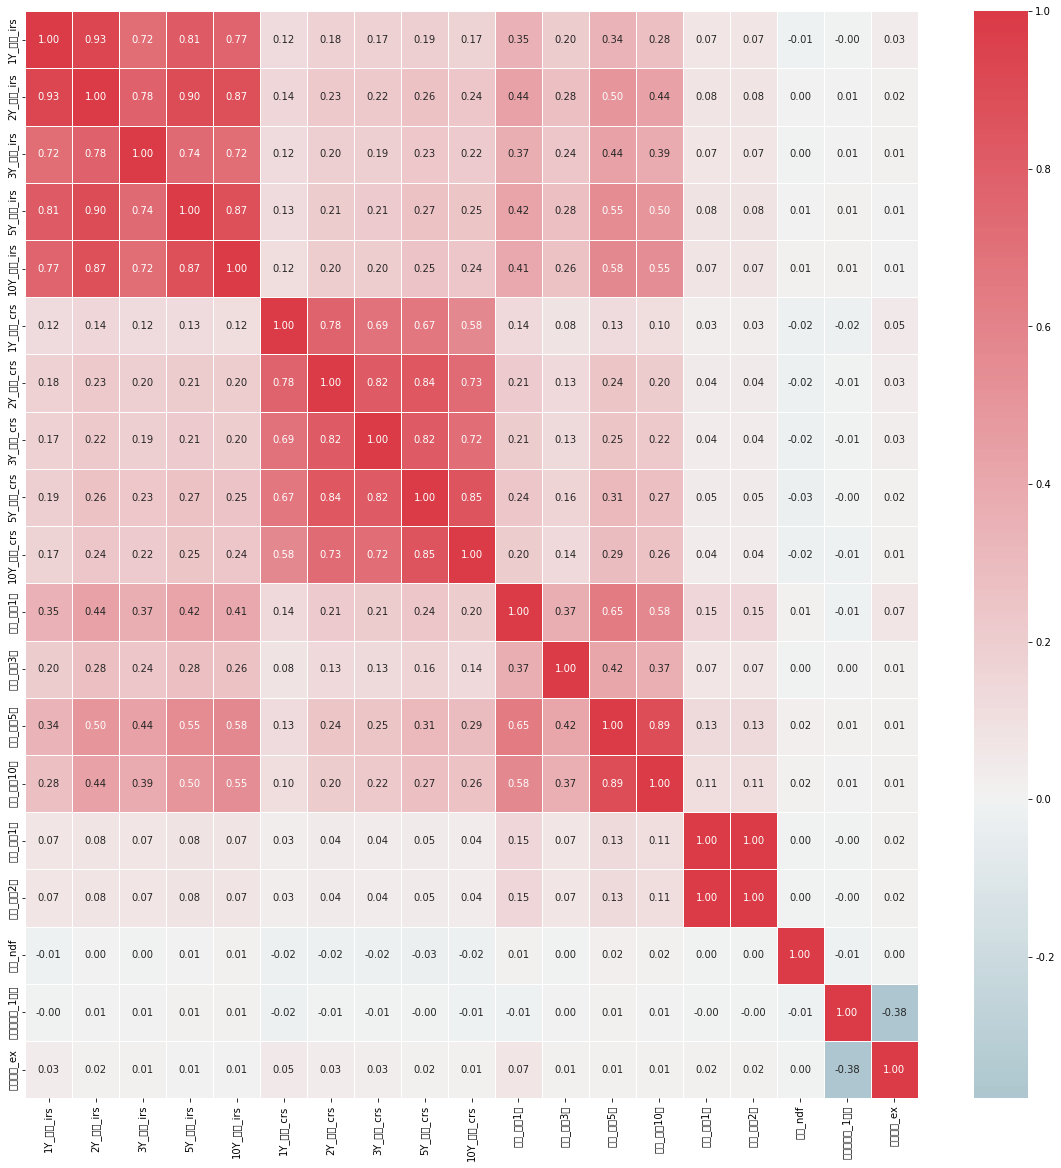

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy as sp  
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20,20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data = x_scaled.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=cmap, center=0)

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     9.970440   1Y_대비_irs
1    19.496499   2Y_대비_irs
2     2.662200   3Y_대비_irs
3     6.469291   5Y_대비_irs
4     5.869954  10Y_대비_irs
5     2.651421   1Y_대비_crs
6     5.264672   2Y_대비_crs
7     3.830395   3Y_대비_crs
8     6.701405   5Y_대비_crs
9     3.716463  10Y_대비_crs
10    1.896574     대비_국고1년
11    1.253046     대비_국고3년
12    6.218321     대비_국고5년
13    5.053757    대비_국고10년
14         inf     대비_통안1년
15         inf     대비_통안2년
16    1.003030      대비_ndf
17    1.169236   스왑포인트_1월물
18    1.181641     전일종가_ex


In [32]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.414e+04
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:00:18   Log-Likelihood:                -7646.7
No. Observations:                2459   AIC:                         1.533e+04
Df Residuals:                    2440   BIC:                         1.544e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.110   1.03e+04      0.000    1134.679    1135.109
1Y_대비_irs      0.1455      0.347      0.420      0.675      -0.534       0.825
2Y_대비_irs      0.5887      0.485      1.214      0.225      -0.362       1.539
3Y_대비_irs      0.0062      0.179      0.034      0.972      -0.345       0.357
5Y_대비_irs     -0.2766      0.279     -0.991      0.322      -0.824       0.271
10Y_대비_irs    -0.5476      0.266     -2.058      0.040      -1.069      -0.026
1Y_대비_crs     -1.0885      0.179     -6.089      0.000      -1.439      -0.738
2Y_대비_crs     -0.2644      0.252     -1.049      0.294      -0.758       0.230
3Y_대비_crs     -0.4358      0.215     -2.028      0.043      -0.857      -0.014
5Y_대비_crs     -0.1713      0.284     -0.603      0.547      -0.729       0.386
10Y_대비_crs     0.1958      0.212      0.925      0.355      -0.219       0.611
대비_국고1년        0.1064      0.151      0.704      0.482      -0.190       0.403
대비_국고3년       -0.2690      0.123     -2.189      0.029      -0.510      -0.028
대비_국고5년        1.0449      0.274      3.817      0.000       0.508       1.582
대비_국고10년      -0.2597      0.247     -1.052      0.293      -0.744       0.224
대비_통안1년       -0.0009      0.056     -0.016      0.987      -0.110       0.108
대비_통안2년       -0.0009      0.056     -0.016      0.987      -0.110       0.108
대비_ndf         0.3932      0.110      3.576      0.000       0.178       0.609
스왑포인트_1월물     -0.1367      0.119     -1.151      0.250      -0.370       0.096
전일종가_ex       55.3548      0.119    463.796      0.000      55.121      55.589
==============================================================================
Omnibus:                       32.854   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.063
Skew:                          -0.020   Prob(JB):                     2.46e-13
Kurtosis:                       3.752   Cond. No.                     6.81e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.32e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [33]:
x_scaled.drop(['2Y_대비_irs'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.930433   1Y_대비_irs
1     2.551577   3Y_대비_irs
2     5.803338   5Y_대비_irs
3     5.218603  10Y_대비_irs
4     2.648561   1Y_대비_crs
5     5.253644   2Y_대비_crs
6     3.827813   3Y_대비_crs
7     6.695883   5Y_대비_crs
8     3.716302  10Y_대비_crs
9     1.884694     대비_국고1년
10    1.246932     대비_국고3년
11    6.127875     대비_국고5년
12    5.039735    대비_국고10년
13         inf     대비_통안1년
14         inf     대비_통안2년
15    1.002506      대비_ndf
16    1.169185   스왑포인트_1월물
17    1.180857     전일종가_ex


In [34]:
x_scaled.drop(['대비_통안2년'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.930433   1Y_대비_irs
1     2.551577   3Y_대비_irs
2     5.803338   5Y_대비_irs
3     5.218603  10Y_대비_irs
4     2.648561   1Y_대비_crs
5     5.253644   2Y_대비_crs
6     3.827813   3Y_대비_crs
7     6.695883   5Y_대비_crs
8     3.716302  10Y_대비_crs
9     1.884694     대비_국고1년
10    1.246932     대비_국고3년
11    6.127875     대비_국고5년
12    5.039735    대비_국고10년
13    1.024785     대비_통안1년
14    1.002506      대비_ndf
15    1.169185   스왑포인트_1월물
16    1.180857     전일종가_ex


In [35]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.496e+04
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:00:19   Log-Likelihood:                -7647.4
No. Observations:                2459   AIC:                         1.533e+04
Df Residuals:                    2441   BIC:                         1.544e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.110   1.03e+04      0.000    1134.679    1135.109
1Y_대비_irs      0.4731      0.218      2.173      0.030       0.046       0.900
3Y_대비_irs      0.0505      0.175      0.288      0.773      -0.293       0.394
5Y_대비_irs     -0.1678      0.265     -0.635      0.526      -0.687       0.351
10Y_대비_irs    -0.4400      0.251     -1.754      0.080      -0.932       0.052
1Y_대비_crs     -1.0957      0.179     -6.131      0.000      -1.446      -0.745
2Y_대비_crs     -0.2504      0.252     -0.995      0.320      -0.744       0.243
3Y_대비_crs     -0.4425      0.215     -2.060      0.040      -0.864      -0.021
5Y_대비_crs     -0.1614      0.284     -0.568      0.570      -0.719       0.396
10Y_대비_crs     0.1975      0.212      0.933      0.351      -0.218       0.613
대비_국고1년        0.1210      0.151      0.802      0.422      -0.175       0.417
대비_국고3년       -0.2586      0.123     -2.109      0.035      -0.499      -0.018
대비_국고5년        1.0850      0.272      3.992      0.000       0.552       1.618
대비_국고10년      -0.2755      0.247     -1.118      0.264      -0.759       0.208
대비_통안1년       -0.0042      0.111     -0.038      0.970      -0.222       0.214
대비_ndf         0.3963      0.110      3.604      0.000       0.181       0.612
스왑포인트_1월물     -0.1358      0.119     -1.143      0.253      -0.369       0.097
전일종가_ex       55.3511      0.119    463.874      0.000      55.117      55.585
==============================================================================
Omnibus:                       32.364   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.961
Skew:                          -0.017   Prob(JB):                     4.28e-13
Kurtosis:                       3.745   Cond. No.                         7.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
x_scaled.drop(['3Y_대비_irs', '5Y_대비_crs', '대비_통안1년'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.610008   1Y_대비_irs
1     5.676417   5Y_대비_irs
2     5.098092  10Y_대비_irs
3     2.646692   1Y_대비_crs
4     4.561613   2Y_대비_crs
5     3.452940   3Y_대비_crs
6     2.433056  10Y_대비_crs
7     1.869217     대비_국고1년
8     1.245939     대비_국고3년
9     6.113315     대비_국고5년
10    5.039198    대비_국고10년
11    1.001917      대비_ndf
12    1.169164   스왑포인트_1월물
13    1.180484     전일종가_ex


In [37]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.819e+04
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:00:19   Log-Likelihood:                -7647.7
No. Observations:                2459   AIC:                         1.533e+04
Df Residuals:                    2444   BIC:                         1.541e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.110   1.03e+04      0.000    1134.679    1135.109
1Y_대비_irs      0.4962      0.209      2.380      0.017       0.087       0.905
5Y_대비_irs     -0.1616      0.261     -0.618      0.537      -0.674       0.351
10Y_대비_irs    -0.4327      0.248     -1.746      0.081      -0.919       0.053
1Y_대비_crs     -1.0959      0.179     -6.138      0.000      -1.446      -0.746
2Y_대비_crs     -0.3005      0.234     -1.282      0.200      -0.760       0.159
3Y_대비_crs     -0.4813      0.204     -2.360      0.018      -0.881      -0.081
10Y_대비_crs     0.1284      0.171      0.750      0.453      -0.207       0.464
대비_국고1년        0.1223      0.150      0.815      0.415      -0.172       0.417
대비_국고3년       -0.2590      0.123     -2.114      0.035      -0.499      -0.019
대비_국고5년        1.0809      0.271      3.983      0.000       0.549       1.613
대비_국고10년      -0.2744      0.246     -1.114      0.266      -0.757       0.209
대비_ndf         0.3978      0.110      3.621      0.000       0.182       0.613
스왑포인트_1월물     -0.1359      0.119     -1.145      0.252      -0.369       0.097
전일종가_ex       55.3513      0.119    464.196      0.000      55.117      55.585
==============================================================================
Omnibus:                       32.218   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.630
Skew:                          -0.016   Prob(JB):                     5.05e-13
Kurtosis:                       3.743   Cond. No.                         6.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
x_scaled.drop(['10Y_대비_crs', '5Y_대비_irs', '스왑포인트_1월물'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     2.801432   1Y_대비_irs
1     3.618882  10Y_대비_irs
2     2.643575   1Y_대비_crs
3     4.163778   2Y_대비_crs
4     3.139773   3Y_대비_crs
5     1.864301     대비_국고1년
6     1.244875     대비_국고3년
7     6.043553     대비_국고5년
8     5.037260    대비_국고10년
9     1.001663      대비_ndf
10    1.010507     전일종가_ex


In [39]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.316e+04
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:00:19   Log-Likelihood:                -7648.8
No. Observations:                2459   AIC:                         1.532e+04
Df Residuals:                    2447   BIC:                         1.539e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.110   1.03e+04      0.000    1134.679    1135.109
1Y_대비_irs      0.4293      0.184      2.338      0.019       0.069       0.789
10Y_대비_irs    -0.5058      0.209     -2.423      0.015      -0.915      -0.096
1Y_대비_crs     -1.0911      0.178     -6.115      0.000      -1.441      -0.741
2Y_대비_crs     -0.2525      0.224     -1.128      0.260      -0.692       0.187
3Y_대비_crs     -0.4374      0.194     -2.250      0.025      -0.819      -0.056
대비_국고1년        0.1136      0.150      0.758      0.448      -0.180       0.407
대비_국고3년       -0.2609      0.122     -2.131      0.033      -0.501      -0.021
대비_국고5년        1.0738      0.270      3.981      0.000       0.545       1.603
대비_국고10년      -0.2718      0.246     -1.104      0.270      -0.755       0.211
대비_ndf         0.3985      0.110      3.629      0.000       0.183       0.614
전일종가_ex       55.4031      0.110    502.268      0.000      55.187      55.619
==============================================================================
Omnibus:                       33.065   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.593
Skew:                          -0.019   Prob(JB):                     1.89e-13
Kurtosis:                       3.755   Cond. No.                         6.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
x_scaled.drop(['2Y_대비_crs'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.547e+04
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:00:20   Log-Likelihood:                -7649.4
No. Observations:                2459   AIC:                         1.532e+04
Df Residuals:                    2448   BIC:                         1.538e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.110   1.03e+04      0.000    1134.679    1135.109
1Y_대비_irs      0.4275      0.184      2.328      0.020       0.067       0.788
10Y_대비_irs    -0.5089      0.209     -2.438      0.015      -0.918      -0.100
1Y_대비_crs     -1.1950      0.153     -7.824      0.000      -1.495      -0.896
3Y_대비_crs     -0.5676      0.156     -3.629      0.000      -0.874      -0.261
대비_국고1년        0.1101      0.150      0.735      0.462      -0.184       0.404
대비_국고3년       -0.2625      0.122     -2.144      0.032      -0.503      -0.022
대비_국고5년        1.0595      0.269      3.932      0.000       0.531       1.588
대비_국고10년      -0.2668      0.246     -1.083      0.279      -0.750       0.216
대비_ndf         0.3994      0.110      3.637      0.000       0.184       0.615
전일종가_ex       55.4034      0.110    502.246      0.000      55.187      55.620
==============================================================================
Omnibus:                       33.603   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.970
Skew:                          -0.015   Prob(JB):                     9.50e-14
Kurtosis:                       3.764   Cond. No.                         5.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
x_scaled.drop(['대비_국고3년'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.826e+04
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:00:20   Log-Likelihood:                -7651.7
No. Observations:                2459   AIC:                         1.532e+04
Df Residuals:                    2449   BIC:                         1.538e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.110   1.03e+04      0.000    1134.679    1135.109
1Y_대비_irs      0.4102      0.184      2.234      0.026       0.050       0.770
10Y_대비_irs    -0.4995      0.209     -2.392      0.017      -0.909      -0.090
1Y_대비_crs     -1.1970      0.153     -7.831      0.000      -1.497      -0.897
3Y_대비_crs     -0.5706      0.157     -3.645      0.000      -0.878      -0.264
대비_국고1년        0.0681      0.149      0.458      0.647      -0.223       0.360
대비_국고5년        0.9725      0.267      3.648      0.000       0.450       1.495
대비_국고10년      -0.2607      0.246     -1.058      0.290      -0.744       0.222
대비_ndf         0.4006      0.110      3.645      0.000       0.185       0.616
전일종가_ex       55.4050      0.110    501.902      0.000      55.189      55.621
==============================================================================
Omnibus:                       33.888   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.510
Skew:                          -0.022   Prob(JB):                     7.25e-14
Kurtosis:                       3.767   Cond. No.                         5.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
x_scaled.drop(['대비_국고1년'], axis=1, inplace=True)

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 3.180e+04
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        16:00:20   Log-Likelihood:                -7651.8
No. Observations:                2459   AIC:                         1.532e+04
Df Residuals:                    2450   BIC:                         1.537e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.110   1.03e+04      0.000    1134.679    1135.109
1Y_대비_irs      0.4277      0.180      2.382      0.017       0.076       0.780
10Y_대비_irs    -0.5120      0.207     -2.473      0.013      -0.918      -0.106
1Y_대비_crs     -1.1950      0.153     -7.823      0.000      -1.495      -0.895
3Y_대비_crs     -0.5693      0.156     -3.638      0.000      -0.876      -0.262
대비_국고5년        1.0143      0.250      4.050      0.000       0.523       1.505
대비_국고10년      -0.2573      0.246     -1.045      0.296      -0.740       0.226
대비_ndf         0.4009      0.110      3.648      0.000       0.185       0.616
전일종가_ex       55.4088      0.110    503.436      0.000      55.193      55.625
==============================================================================
Omnibus:                       33.599   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.752
Skew:                          -0.024   Prob(JB):                     1.06e-13
Kurtosis:                       3.762   Cond. No.                         5.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
import numpy as np 
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=10)
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

y_pred = mlr.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)

print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test, y_pred)))


MSE : 30.110440489805484, RMSE :  5.487, MAE: 5.487
Variance score :  0.990


In [44]:
from sklearn.model_selection import cross_val_score
neg_mse_scores = cross_val_score(mlr, x_scaled, y,scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 *neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_rmse,rmse_scores, neg_mse_scores

(5.470558865974438,
 array([4.14726392, 6.74314245, 5.80113044, 5.50348483, 5.1577727 ]),
 array([-17.19979801, -45.46997015, -33.65311433, -30.28834522,
        -26.60261918]))